In [1]:
import numpy as np
import pandas as pd
import copy
import math       
%matplotlib inline      
from itertools import product     
from matplotlib import pyplot as plt
import seaborn as sns

# Task Iterations

In [2]:

def load_data(ds="CF100"):
    # accumulation
    accs = pd.read_csv(f'csvs_plots_2/{ds}/Task_Iter[{ds}][accs].csv')
    # rename id to ID   
    accs.rename(columns={'id': 'ID'}, inplace=True)   
    df_config = pd.read_csv(f'csvs_plots_2/{ds}/Task_Iter[{ds}].csv')
    accs = pd.merge(accs, df_config, on='ID')

    after = pd.read_csv(f'csvs_plots_2/{ds}/Task_Iter[{ds}][after].csv')
    before = pd.read_csv(f'csvs_plots_2/{ds}/Task_Iter[{ds}][before].csv')
    # AUC = pd.read_csv('csvs_plots_2/CF100_2/TI_AUC.csv')
    lr_speed = pd.read_csv(f'csvs_plots_2/{ds}/Task_Iter[{ds}][lr_speed_norm].csv')  
    dfs = {'after': after, 'before': before, 'lr_speed': lr_speed}
    return df_config, accs, dfs
      
df_config,accs,dfs = load_data("MNIST")
datasets = ["CF10","MNIST"]

# for ds in datasets:         
#     df_confif_here, accs_here, dfs_here = load_data(ds)
#     #condat 
#     df_config = pd.concat([df_config, df_confif_here])
#     accs = pd.concat([accs, accs_here])
#     for k,v in dfs.items():
#         dfs[k] = pd.concat([dfs[k], dfs_here[k]])
    

after
before
lr_speed


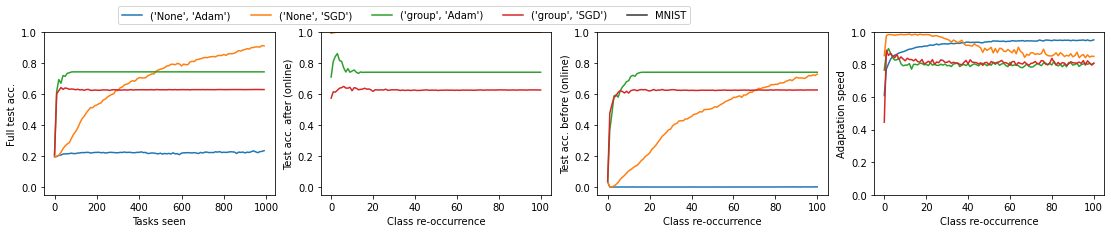

In [4]:
hue = ["masking", "optim"]     
style = ["dataset"]
df_here=accs 
df_here = df_here[df_here["replay"] == "None"].reset_index(drop=True)     
df_here.loc[df_here["nb_epochs"] == 0, "Training (Mask, Optim)"] = "convergence"
df_here.loc[df_here["nb_epochs"] == 1, "Training (Mask, Optim)"] = "1 epoch"
df_here=df_here[df_here["Training (Mask, Optim)"] == "convergence"]
        
df_here.loc[df_here["scenario"] == "default", "scenario"] = "SCoLe"
df_here.loc[df_here["scenario"] == "classical_cl_repeated", "scenario"] = "Tasks Iteration"   

df_here=df_here[df_here["scenario"] == "Tasks Iteration"]    
# only every 10th task_x
df_here = df_here[df_here["task_x"] % 10 == 0]                   
palette = sns.color_palette("tab10", len(df_here[hue].apply(tuple, axis=1).unique()))    

# pallete mapping
palette = {k: v for k, v in zip(df_here[hue].apply(tuple, axis=1).unique(), palette)}    
          
fig, axs = plt.subplots(1,4,figsize=(19,3))
# set figure title
# fig.suptitle('Task set iterations (CF100)', fontsize=16)  
sns.lineplot(x='task_x', y='test_acc_x', hue=df_here[hue].apply(tuple, axis=1), data=df_here, style="dataset", palette=palette, ax=axs[0], ci=None)
axs[0].set(xlabel='Tasks seen',ylabel="Full test acc.")
axs[0].set_ylim(-0.05,1) 
# axs[0].set_title("global test set acc.")               
y_lim = [(-0.05,1), (-0.05,1), (0.,1.0)]    
x_names = ["Class re-occurrence", "Class re-occurrence", "Class re-occurrence"]   
y_names = ["Test acc. after (online)", "Test acc. before (online)", "Adaptation speed"]
for i,(n,df) in enumerate(dfs.items()):
        # axs[i+1].set_title(n)                  
        print(n)                                 
        df.rename(columns={'id': 'ID'}, inplace=True)
        df = pd.merge(df, df_config, on='ID')#.reset_index(drop=True)
        df = df[df["time_seen"] <= 100]  
        # set training to "convergence" where nb_epochs is 0 and "1 epoch" where nb_epochs is 1
        df.loc[df["nb_epochs"] == 0, "Training (Mask, Optim)"] = "convergence"
        df.loc[df["nb_epochs"] == 1, "Training (Mask, Optim)"] = "1 epoch"                
        df.loc[df["scenario"] == "default", "scenario"] = "SCoLe"
        df.loc[df["scenario"] == "classical_cl_repeated", "scenario"] = "Tasks Iteration"  
        
        df=df[df["scenario"] == "Tasks Iteration"]    
        df=df[df["Training (Mask, Optim)"] == "convergence"]                           
        sns.lineplot(x='time_seen', y='mean_acc', hue=df[hue].apply(tuple, axis=1), style="dataset", data=df, ax=axs[i+1], palette=palette, ci=None)
        axs[i+1].set(xlabel=x_names[i],ylabel=y_names[i])
        #set y axis interval
        axs[i+1].set_ylim(*y_lim[i])
        # if i>0:
          #remove lagend           
        axs[i+1].get_legend().remove()    
        
# axs[0].get_legend().remove()                 
axs[0].legend(loc='center left', bbox_to_anchor=(0.3, 1.1), ncol=8)
# # set lagend title    
# axs[0].legend_.set_title("(Masking, Optim)")
# save the figure as pdf             
plt.savefig('csvs_plots_2/CF100/KA_Dynamics[CF100].pdf', bbox_inches='tight')


# SCoLe

In [12]:

def load_data(ds="CF100"):
    # accumulation
    accs = pd.read_csv(f'csvs_plots_2/{ds}/SCOLE[{ds}][accs].csv')
    # rename id to ID   
    accs.rename(columns={'id': 'ID'}, inplace=True)   
    df_config = pd.read_csv(f'csvs_plots_2/{ds}/SCOLE[{ds}].csv')
    accs = pd.merge(accs, df_config, on='ID')

    after = pd.read_csv(f'csvs_plots_2/{ds}/SCOLE[{ds}][after].csv')
    before = pd.read_csv(f'csvs_plots_2/{ds}/SCOLE[{ds}][before].csv')
    # AUC = pd.read_csv('csvs_plots_2/CF100_2/TI_AUC.csv')
    lr_speed = pd.read_csv(f'csvs_plots_2/{ds}/SCOLE[{ds}][lr_speed_norm].csv')  
    dfs = {'after': after, 'before': before, 'lr_speed': lr_speed}
    return df_config, accs, dfs
      
df_config,accs,dfs = load_data("CF100")
datasets = ["CF10","MNIST"]

# for ds in datasets:         
#     df_confif_here, accs_here, dfs_here = load_data(ds)
#     #condat 
#     df_config = pd.concat([df_config, df_confif_here])
#     accs = pd.concat([accs, accs_here])
#     for k,v in dfs.items():
#         dfs[k] = pd.concat([dfs[k], dfs_here[k]])
    

after
before
lr_speed


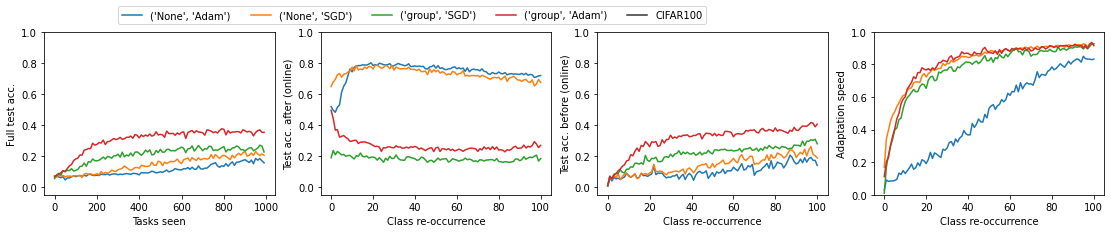

In [17]:
hue = ["masking", "optim"]     
style = ["dataset"]
df_here=accs 
df_here = df_here[df_here["replay"] == "None"].reset_index(drop=True)     
df_here.loc[df_here["nb_epochs"] == 0, "Training (Mask, Optim)"] = "convergence"
df_here.loc[df_here["nb_epochs"] == 1, "Training (Mask, Optim)"] = "1 epoch"
df_here=df_here[df_here["Training (Mask, Optim)"] == "convergence"]
        
df_here.loc[df_here["scenario"] == "default", "scenario"] = "SCoLe"
df_here.loc[df_here["scenario"] == "classical_cl_repeated", "scenario"] = "Tasks Iteration"   

df_here=df_here[df_here["scenario"] == "SCoLe"]    
# only every 10th task_x
df_here = df_here[df_here["task_x"] % 10 == 0]                   
palette = sns.color_palette("tab10", len(df_here[hue].apply(tuple, axis=1).unique()))    

# pallete mapping
palette = {k: v for k, v in zip(df_here[hue].apply(tuple, axis=1).unique(), palette)}    
          
fig, axs = plt.subplots(1,4,figsize=(19,3))
# set figure title
# fig.suptitle('Task set iterations (CF100)', fontsize=16)  
sns.lineplot(x='task_x', y='test_acc_x', hue=df_here[hue].apply(tuple, axis=1), data=df_here, style="dataset", palette=palette, ax=axs[0], ci=None)
axs[0].set(xlabel='Tasks seen',ylabel="Full test acc.")
axs[0].set_ylim(-0.05,1) 
# axs[0].set_title("global test set acc.")               
y_lim = [(-0.05,1), (-0.05,1), (0.,1.0)]    
x_names = ["Class re-occurrence", "Class re-occurrence", "Class re-occurrence"]   
y_names = ["Test acc. after (online)", "Test acc. before (online)", "Adaptation speed"]

for i,(n,df) in enumerate(dfs.items()):
        # axs[i+1].set_title(n)                  
        print(n)                                 
        df.rename(columns={'id': 'ID'}, inplace=True)
        df = pd.merge(df, df_config, on='ID')#.reset_index(drop=True)
        df = df[df["time_seen"] <= 100]  
        # set training to "convergence" where nb_epochs is 0 and "1 epoch" where nb_epochs is 1
        df.loc[df["nb_epochs"] == 0, "Training (Mask, Optim)"] = "convergence"
        df.loc[df["nb_epochs"] == 1, "Training (Mask, Optim)"] = "1 epoch"                
        df.loc[df["scenario"] == "default", "scenario"] = "SCoLe"
        df.loc[df["scenario"] == "classical_cl_repeated", "scenario"] = "Tasks Iteration"  
        
        df=df[df["scenario"] == "SCoLe"]    
        df=df[df["Training (Mask, Optim)"] == "convergence"]                           
        sns.lineplot(x='time_seen', y='mean_acc', hue=df[hue].apply(tuple, axis=1), style="dataset", data=df, ax=axs[i+1], palette=palette, ci=None)
        axs[i+1].set(xlabel=x_names[i],ylabel=y_names[i])
        #set y axis interval
        axs[i+1].set_ylim(*y_lim[i])
        # if i>0:
          #remove lagend           
        axs[i+1].get_legend().remove()    
        
# axs[0].get_legend().remove()                 
axs[0].legend(loc='center left', bbox_to_anchor=(0.3, 1.1), ncol=8)
# # set lagend title    
# axs[0].legend_.set_title("(Masking, Optim)")
# save the figure as pdf             
plt.savefig('csvs_plots_2/CF100/KA_Dynamics[CF100].pdf', bbox_inches='tight')


### Multihead

after mh
before mh


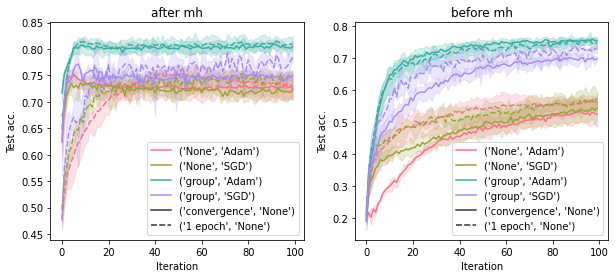

In [ ]:

after_mh = pd.read_csv('csvs_plots_2/CF100/KA_Task_Iter[CF100][after mh].csv') 
before_mh = pd.read_csv('csvs_plots_2/CF100/KA_Task_Iter[CF100][before mh].csv')

dfs = {'after mh': after_mh, 'before mh': before_mh}
 
palette = sns.color_palette("husl", len(df_here[hue].apply(tuple, axis=1).unique()))            
fig, axs = plt.subplots(1,2,figsize=(10,4))  
                    
for i,(n,df) in enumerate(dfs.items()):
        axs[i].set_title(n)                         
        print(n)       
        df.rename(columns={'id': 'ID'}, inplace=True)
        df = pd.merge(df, df_config, on='ID')#.reset_index(drop=True)
        df = df[df["time_seen"] <= 100]  
        # set training to "convergence" where nb_epochs is 0 and "1 epoch" where nb_epochs is 1
        df.loc[df["nb_epochs"] == 0, "training"] = "convergence"
        df.loc[df["nb_epochs"] == 1, "training"] = "1 epoch"                                 
        sns.lineplot(x='time_seen', y='mean_acc', hue=df[hue].apply(tuple, axis=1), style=df[style].apply(tuple, axis=1), data=df, ax=axs[i], palette=palette)
        # remove lagend from axs[i]
        # axs[i].get_legend().remove() 
        axs[i].set(xlabel='Iteration',ylabel="Test acc.")

### Compae EWC with replay

after
before
AUC
lr_speed


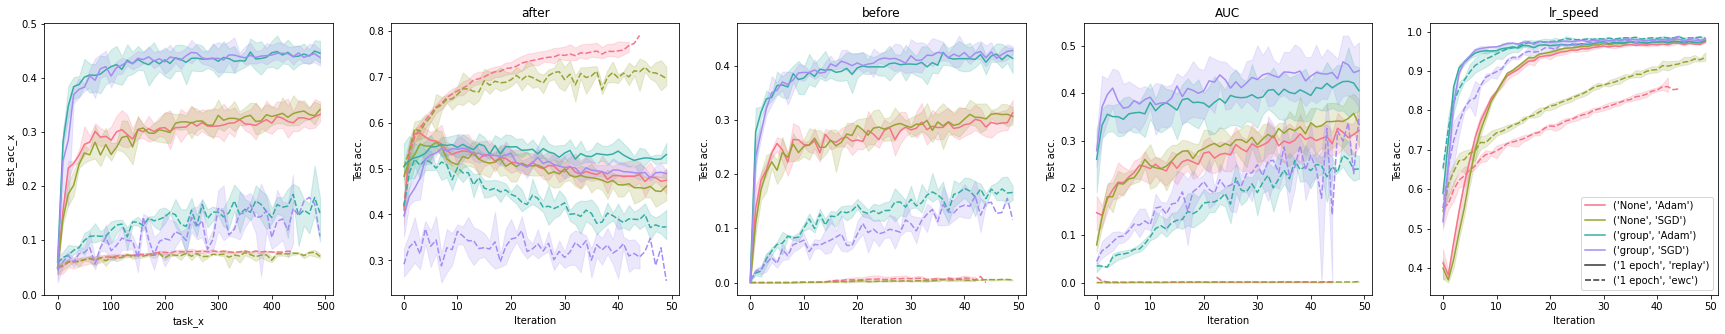

In [ ]:
hue = ["masking", "optim"]  
style = ["training", "cl_strategy"]
df_here=scole_accs#[scole_accs["nb_epochs"]==1]  
# query with only ewc <=1 and cl_strategy is not None
query = "ewc <= 1 and cl_strategy != 'None'"
df_here = df_here.query(query).reset_index(drop=True)

# set training to "convergence" where nb_epochs is 0 and "1 epoch" where nb_epochs is 1
df_here.loc[df_here["nb_epochs"] == 0, "training"] = "convergence"
df_here.loc[df_here["nb_epochs"] == 1, "training"] = "1 epoch"
# only every 10th task_x
df_here = df_here[df_here["task_x"] % 10 == 0]                         
palette = sns.color_palette("husl", len(df_here[hue].apply(tuple, axis=1).unique()))            
fig, axs = plt.subplots(1,5,figsize=(30,5))  
sns.lineplot(x='task_x', y='test_acc_x', hue=df_here[hue].apply(tuple, axis=1), style=df_here[style].apply(tuple, axis=1), data=df_here, palette=palette, ax=axs[0])

for i,(n,df) in enumerate(dfs.items()):
        axs[i+1].set_title(n)                         
        print(n)                                 
        df.rename(columns={'id': 'ID'}, inplace=True)
        df = pd.merge(df, df_config, on='ID')#.reset_index(drop=True)
        df = df[df["time_seen"] <= 100]  
        # set training to "convergence" where nb_epochs is 0 and "1 epoch" where nb_epochs is 1
        df.loc[df["nb_epochs"] == 0, "training"] = "convergence"
        df.loc[df["nb_epochs"] == 1, "training"] = "1 epoch"          
        df = df.query(query)             
        sns.lineplot(x='time_seen', y='mean_acc', hue=df[hue].apply(tuple, axis=1), style=df[style].apply(tuple, axis=1), data=df, ax=axs[i+1], palette=palette)
        # remove lagend from axs[i]
        axs[i].get_legend().remove() 
        axs[i+1].set(xlabel='Iteration',ylabel="Test acc.")


## Meta-test

In [24]:

df_config = pd.read_csv('csvs_plots_2/CF100/meta_1e/[1 epoch testing][config].csv')
df_config = df_config[df_config["rand_perturb_severity"] == 1] 
df_config2 = pd.read_csv('csvs_plots_2/CF100/meta_1e/[1 epoch testing][no_perturb][config].csv')
df_config2 = df_config2[df_config2["meta_test_prevent_reocurence_of_classes"] == 1]
#merge 
df_config = pd.concat([df_config, df_config2], ignore_index=True)
#convert rand_perturb and nb_epochs to string  
df_config["rand_perturb"] = df_config["rand_perturb"].astype(str)
df_config = df_config.replace({"rand_perturb": {"0": "interm. same domain", "2": "intermdiate random"}})
# rename column rand_perturb to "random intermediate"             
df_config.rename(columns={'rand_perturb': 'random intermediate'}, inplace=True)

df_config["nb_epochs"] = df_config["nb_epochs"].astype(str)             
df_config["revisit_meta_task_every"] = df_config["revisit_meta_task_every"].astype(str)

accs1 = pd.read_csv('csvs_plots_2/CF100/meta_1e/meta_test[CF100:5,50][1 epoch testing][accs].csv')
accs2 = pd.read_csv('csvs_plots_2/CF100/meta_1e/meta_test[CF100:5,50][1 epoch testing][no_perturb][accs].csv')
accs = pd.concat([accs1, accs2], ignore_index=True)
 
accs.rename(columns={'id': 'ID'}, inplace=True)
df = pd.merge(accs, df_config, on='ID')

test_before_mh
test_after_mh


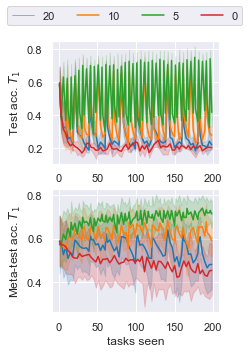

In [19]:
hue = ["revisit_meta_task_every"]
style = ["rand_perturb"]                            
plot_col= ["test_before_mh", "test_after_mh"]#,"lr_speed"]          
palette = sns.color_palette("tab10",4)  
x_names = ["", "tasks seen", "tasks seen"]
y_names = [r"Test acc. $T_1$", r"Meta-test acc. $T_1$", r"Learning rate speed"]
# seaborn put grey background of plot
# sns.set_style("whitegrid")      
sns.set(font_scale=1)
   
fig, axs = plt.subplots(2,1,figsize=(3,5))  
for i,c in enumerate(plot_col):     
    # axs.set_title(c)  
    print(c)                           
    df_here = df[(df["meta_testing"] == 1)]      
    df_here=df_here[df_config["random intermediate"]=="intermdiate random"]
    # rename column rand_perturb to "random intermediate"
    # df_here.rename(columns={'revisit_meta_task_every': r"Revisit $T_1$"}, inplace=True)
    
    # df_here = df_here[df_here["task_x"] <= 60]   
    # df_here[c] = df_here.groupby("ID")[c].rolling(5).mean().reset_index(0,drop=True)   
    sns.lineplot(x='task_x', y=c, hue="revisit_meta_task_every", data=df_here, 
                 ax=axs[i], palette=palette)#, ci=None) #style="random intermediate",
    axs[i].set(xlabel=x_names[i],ylabel=y_names[i])
    # rename legend title
    axs[i].legend(title=r"Revisit $T_1$")
    # remove
    # save figure as pdf   
    plt.savefig(f"csvs_plots_2/CF100/meta_1e/{c}.pdf", bbox_inches='tight') 
    # remove legend from axs[i]
    # put the legend over the plot    
    axs[i].legend(loc='center left', bbox_to_anchor=(-0.3, 1.2), ncol=4)
    # shorten the lines in the legend
    axs[i].get_legend().get_lines()[0].set_linewidth(0.5)
    if i!=0:   
        axs[i].get_legend().remove()

<AxesSubplot:xlabel='task_x', ylabel='test_acc_x'>

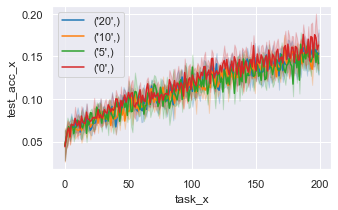

In [27]:
hue = ["revisit_meta_task_every"]        
plot_col= ["test_before_mh", "test_after_mh"]#,"lr_speed"]          
palette = sns.color_palette("tab10",4)  
x_names = ["", "tasks seen", "tasks seen"]
y_names = [r"Test acc. $T_1$", r"Meta-test acc. $T_1$", r"Learning rate speed"]
df_here= df
# seaborn put grey background of plot
# sns.set_style("whitegrid")      
sns.set(font_scale=1)

# filter only runs without perturbation    
df_here = df_here[df_here["random intermediate"] == "interm. same domain"]
   
fig, axs = plt.subplots(figsize=(5,3))  
sns.lineplot(x='task_x', y='test_acc_x', hue=df_here[hue].apply(tuple, axis=1), data=df_here, palette=palette, ax=axs)#, ci=None)

In [20]:
df_here["random intermediate"]

Series([], Name: random intermediate, dtype: object)

test_before_mh


<ipython-input-402-55bb0737901e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_here[c] = df_here.groupby("ID")[c].rolling(5).mean().reset_index(0,drop=True)


test_after_mh


<ipython-input-402-55bb0737901e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_here[c] = df_here.groupby("ID")[c].rolling(5).mean().reset_index(0,drop=True)


lr_speed


<ipython-input-402-55bb0737901e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_here[c] = df_here.groupby("ID")[c].rolling(5).mean().reset_index(0,drop=True)


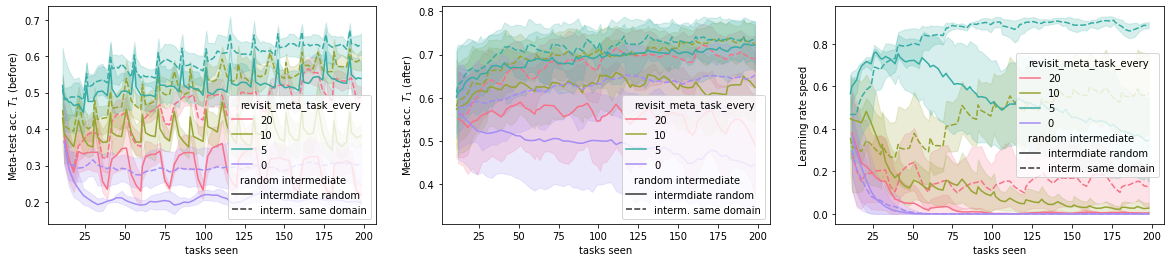

In [ ]:
hue = ["revisit_meta_task_every"]
style = ["rand_perturb"]                            
plot_col= ["test_before_mh", "test_after_mh","lr_speed"]          
palette = sns.color_palette("husl", 4)  
x_names = ["tasks seen", "tasks seen", "tasks seen"]
y_names = [r"Meta-test acc. $T_1$ (before)", r"Meta-test acc. $T_1$ (after)", r"Learning rate speed"]

fig, axs = plt.subplots(1,3,figsize=(20,4))  
for i,c in enumerate(plot_col):     
    # axs.set_title(c)  
    print(c)                           
    df_here = df[(df["meta_testing"] == 1)]      
    df_here[c] = df_here.groupby("ID")[c].rolling(5).mean().reset_index(0,drop=True)        
    sns.lineplot(x='task_x', y=c, hue="revisit_meta_task_every", data=df_here, ax=axs[i], style="random intermediate", palette=palette)#, ci=None) #style="random intermediate",
    # remove lagend from axs[i]
    # axs[i].get_legend().remove()   
    axs[i].set(xlabel=x_names[i],ylabel=y_names[i])
    # remove legend from axs[i]
    # if i<len(dfs.items())-1:   
    #     axs[i].get_legend().remove()

### Source of transfer